# 主成分分析

决策树准确率: 1.00

特征重要性排序:
       特征  重要性
8     PbO  1.0
1    Na2O  0.0
0    SiO2  0.0
3     CaO  0.0
4     MgO  0.0
5   Al2O3  0.0
2     K2O  0.0
6   Fe2O3  0.0
7     CuO  0.0
9     BaO  0.0
10   P2O5  0.0
11    SrO  0.0
12   SnO2  0.0
13    SO2  0.0
14   有无风化  0.0


C:\Users\86183\AppData\Local\Temp\ipykernel_72108\27241634.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['有无风化'] = le_surface.fit_transform(X['有无风化'])


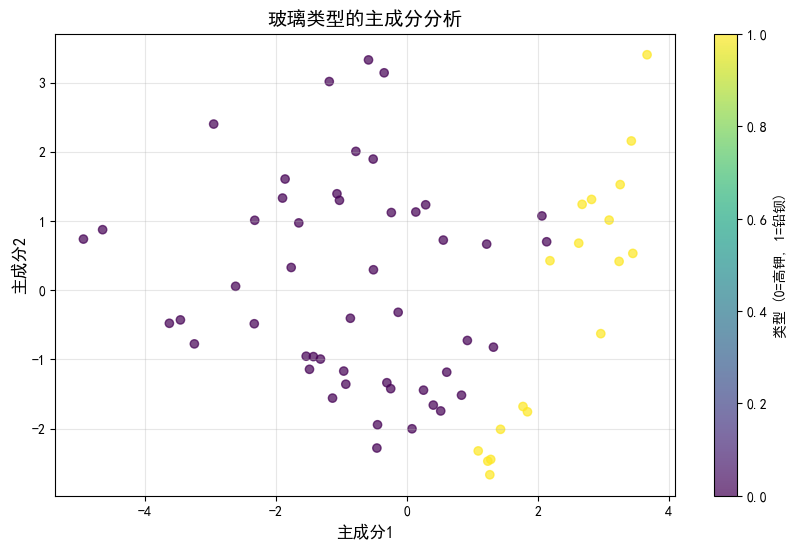


主成分贡献率:
PC1: 28.97%
PC2: 17.23%

主成分载荷矩阵:
            PC1       PC2
SiO2   0.790121 -0.521227
Na2O   0.098574 -0.334798
K2O    0.670036  0.257045
CaO    0.351540  0.675398
MgO    0.398665  0.629336
Al2O3  0.608053  0.377413
Fe2O3  0.467809  0.579445
CuO   -0.298655  0.039070
PbO   -0.768513  0.285109
BaO   -0.771627 -0.060335
P2O5  -0.405399  0.675905
SrO   -0.684503  0.343897
SnO2   0.211944  0.047758
SO2   -0.457849  0.071559


In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取数据
df = pd.read_excel('附件-处理.xlsx', sheet_name='表单2')

# 处理列名
columns = ['文物采样点', '类型', '有无风化', 'SiO2', 'Na2O', 'K2O', 'CaO', 
           'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 
           'SnO2', 'SO2']
df.columns = columns

# 数据清洗：筛选化学成分总和85%-105%的数据
chemical_columns = ['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 
                    'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 
                    'SnO2', 'SO2']
df['总和'] = df[chemical_columns].sum(axis=1)
filtered_df = df[(df['总和'] >= 85) & (df['总和'] <= 105)].copy()

# 填充缺失值为0
filtered_df[chemical_columns] = filtered_df[chemical_columns].fillna(0)

# 准备特征矩阵和标签
X = filtered_df[['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 
                'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 
                'SnO2', 'SO2', '有无风化']]
y = filtered_df['类型']

# 编码类别变量
le_type = LabelEncoder()
y = le_type.fit_transform(y)

le_surface = LabelEncoder()
X['有无风化'] = le_surface.fit_transform(X['有无风化'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 训练决策树模型
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 评估模型
y_pred = clf.predict(X_test)
print(f"决策树准确率: {accuracy_score(y_test, y_pred):.2f}")

# 输出特征重要性
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': clf.feature_importances_
}).sort_values('重要性', ascending=False)
print("\n特征重要性排序:")
print(feature_importance)

# 主成分分析
# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_df[chemical_columns])

# 执行PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 可视化
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    principal_components[:, 0], 
    principal_components[:, 1], 
    c=y, 
    cmap='viridis', 
    alpha=0.7
)
plt.xlabel('主成分1', fontsize=12)
plt.ylabel('主成分2', fontsize=12)
plt.title('玻璃类型的主成分分析', fontsize=14)
plt.colorbar(scatter, label='类型 (0=高钾, 1=铅钡)')
plt.grid(True, alpha=0.3)
plt.show()

# 输出主成分贡献率
print("\n主成分贡献率:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")

# 输出载荷矩阵
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings, 
    columns=['PC1', 'PC2'], 
    index=chemical_columns
)
print("\n主成分载荷矩阵:")
print(loading_matrix)

决策树准确率: 1.00

特征重要性排序:
       特征  重要性
8     PbO  1.0
1    Na2O  0.0
0    SiO2  0.0
3     CaO  0.0
4     MgO  0.0
5   Al2O3  0.0
2     K2O  0.0
6   Fe2O3  0.0
7     CuO  0.0
9     BaO  0.0
10   P2O5  0.0
11    SrO  0.0
12   SnO2  0.0
13    SO2  0.0
14   有无风化  0.0


C:\Users\86183\AppData\Local\Temp\ipykernel_72108\2154476498.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['有无风化'] = le_surface.fit_transform(X['有无风化'])  # 无风化=0，风化=1


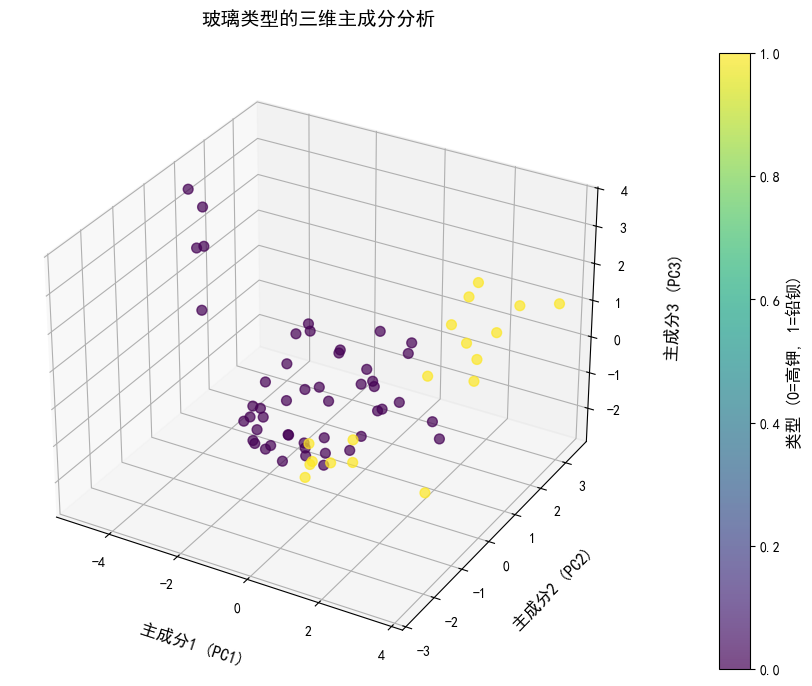


主成分贡献率:
PC1: 28.97%
PC2: 17.23%
PC3: 12.42%
累积贡献率: 58.62%

主成分载荷矩阵:
            PC1       PC2       PC3
SiO2   0.790121 -0.521227  0.001657
Na2O   0.098574 -0.334798 -0.026295
K2O    0.670036  0.257045  0.454521
CaO    0.351540  0.675398  0.366790
MgO    0.398665  0.629336 -0.307238
Al2O3  0.608053  0.377413 -0.038564
Fe2O3  0.467809  0.579445  0.123119
CuO   -0.298655  0.039070  0.742333
PbO   -0.768513  0.285109 -0.428991
BaO   -0.771627 -0.060335  0.441231
P2O5  -0.405399  0.675905 -0.110457
SrO   -0.684503  0.343897 -0.196513
SnO2   0.211944  0.047758 -0.237315
SO2   -0.457849  0.071559  0.525018


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False    # 显示负号

# ===================== 数据预处理 =====================
df = pd.read_excel('附件-处理.xlsx', sheet_name='表单2')

# 规范列名
columns = ['文物采样点', '类型', '有无风化', 'SiO2', 'Na2O', 'K2O', 'CaO', 
           'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 
           'SnO2', 'SO2']
df.columns = columns

# 清洗数据：保留化学成分总和85%-105%的样本
chemical_cols = ['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 
                'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 
                'SnO2', 'SO2']
df['总和'] = df[chemical_cols].sum(axis=1)
filtered_df = df[(df['总和'] >= 85) & (df['总和'] <= 105)].copy()

# 填充缺失值为0
filtered_df[chemical_cols] = filtered_df[chemical_cols].fillna(0)

# ===================== 特征工程 =====================
X = filtered_df[['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 
                'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 
                'SnO2', 'SO2', '有无风化']]  # 包含风化状态
y = filtered_df['类型']

# 编码类别变量
le_type = LabelEncoder()
y = le_type.fit_transform(y)  # 0=高钾，1=铅钡

le_surface = LabelEncoder()
X['有无风化'] = le_surface.fit_transform(X['有无风化'])  # 无风化=0，风化=1

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===================== 决策树模型 =====================
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 评估模型
y_pred = clf.predict(X_test)
print(f"决策树准确率: {accuracy_score(y_test, y_pred):.2f}")

# 特征重要性
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': clf.feature_importances_
}).sort_values('重要性', ascending=False)
print("\n特征重要性排序:")
print(feature_importance)

# ===================== 改进的PCA（3个主成分） =====================
# 标准化数据（仅化学成分）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_df[chemical_cols])  # 使用化学成分列

# 执行3主成分PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# ===================== 三维可视化 =====================
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
scatter = ax.scatter(
    principal_components[:, 0],  # PC1
    principal_components[:, 1],  # PC2
    principal_components[:, 2],  # PC3
    c=y,                          # 颜色对应类型（高钾/铅钡）
    cmap='viridis',
    alpha=0.7,
    s=50  # 点的大小
)

# 设置坐标轴标签
ax.set_xlabel('主成分1 (PC1)', labelpad=15, fontsize=12)
ax.set_ylabel('主成分2 (PC2)', labelpad=15, fontsize=12)
ax.set_zlabel('主成分3 (PC3)', labelpad=15, fontsize=12)
plt.title('玻璃类型的三维主成分分析', fontsize=14, pad=20)

# 添加颜色图例
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('类型 (0=高钾, 1=铅钡)', fontsize=12)

plt.show()

# ===================== 主成分统计结果 =====================
print("\n主成分贡献率:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"PC3: {pca.explained_variance_ratio_[2]:.2%}")
print(f"累积贡献率: {sum(pca.explained_variance_ratio_):.2%}")

# 计算载荷矩阵（特征与主成分的相关系数）
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=chemical_cols
)
print("\n主成分载荷矩阵:")
print(loading_matrix)

# # ===================== 补充分析建议 =====================
# print("\n--- 补充分析建议 ---")
# print("1. 观察PC3是否与特定化学成分强相关（如SO2可能反映风化产物）")
# print("2. 结合载荷矩阵分析亚类划分依据")
# print("3. 使用碎石图判断最佳主成分数量")